In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
from gcs import  path_handler as ph

In [2]:
# Configure Matplotlib to use LaTeX for text rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use 'serif' or specify the exact font family
    "font.serif": ["Times New Roman"],  # Replace with the font used in your LaTeX document
    "axes.labelsize": 12,  # Font size for axis labels
    "font.size": 12,  # General font size
    "legend.fontsize": 12,  # Font size for legend
    "xtick.labelsize": 12,  # Font size for x-axis tick labels
    "ytick.labelsize": 12,  # Font size for y-axis tick labels
})

In [3]:
results_path=ph.paths['simulations'] + "/ImpactGeometry/pouliasis2017pii-GCNBody/Pal5"+"/AllImpactGeometryByHandAndEye.csv"
results = pd.read_csv(results_path)
withgap=results[results['gap_flag']]


In [4]:
# selected_columns = ["v_rel","Mass","impact_parameter","gap_flag","T","tau"]
selected_columns = ["v_rel","Mass","impact_parameter","gap_flag",]
selected_df=results[selected_columns]
# selected_df.rename(columns={"v_rel":"Relative velocity [km/s]","Mass":"Mass [$M_{\odot}$]","impact_parameter":"Impact parameter [kpc]","gap_flag":"gap_flag",},inplace=True)
selected_df.rename(columns={"v_rel":"Relative velocity [km/s]","Mass":"Mass [$M_{\odot}$]","impact_parameter":"Impact parameter [kpc]","gap_flag":"gap_flag","T":"Time of impact [s kpc / km]","tau":r"$\tau$ [s kpc/km]"},inplace=True)
target_columns=["Relative velocity [km/s]","Mass [$M_{\odot}$]","Impact parameter [kpc]",]

axis_labels = {
    "Relative velocity [km/s]": r"$\delta v$ [km/s]",
    "Mass [$M_{\odot}$]": r"$M$ [$M_{\odot}$]",
    "Impact parameter [kpc]": r"$b$ [kpc]",
}

/tmp/ipykernel_49274/3724264420.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.rename(columns={"v_rel":"Relative velocity [km/s]","Mass":"Mass [$M_{\odot}$]","impact_parameter":"Impact parameter [kpc]","gap_flag":"gap_flag","T":"Time of impact [s kpc / km]","tau":r"$\tau$ [s kpc/km]"},inplace=True)


In [5]:
gap_flag=selected_df['gap_flag']

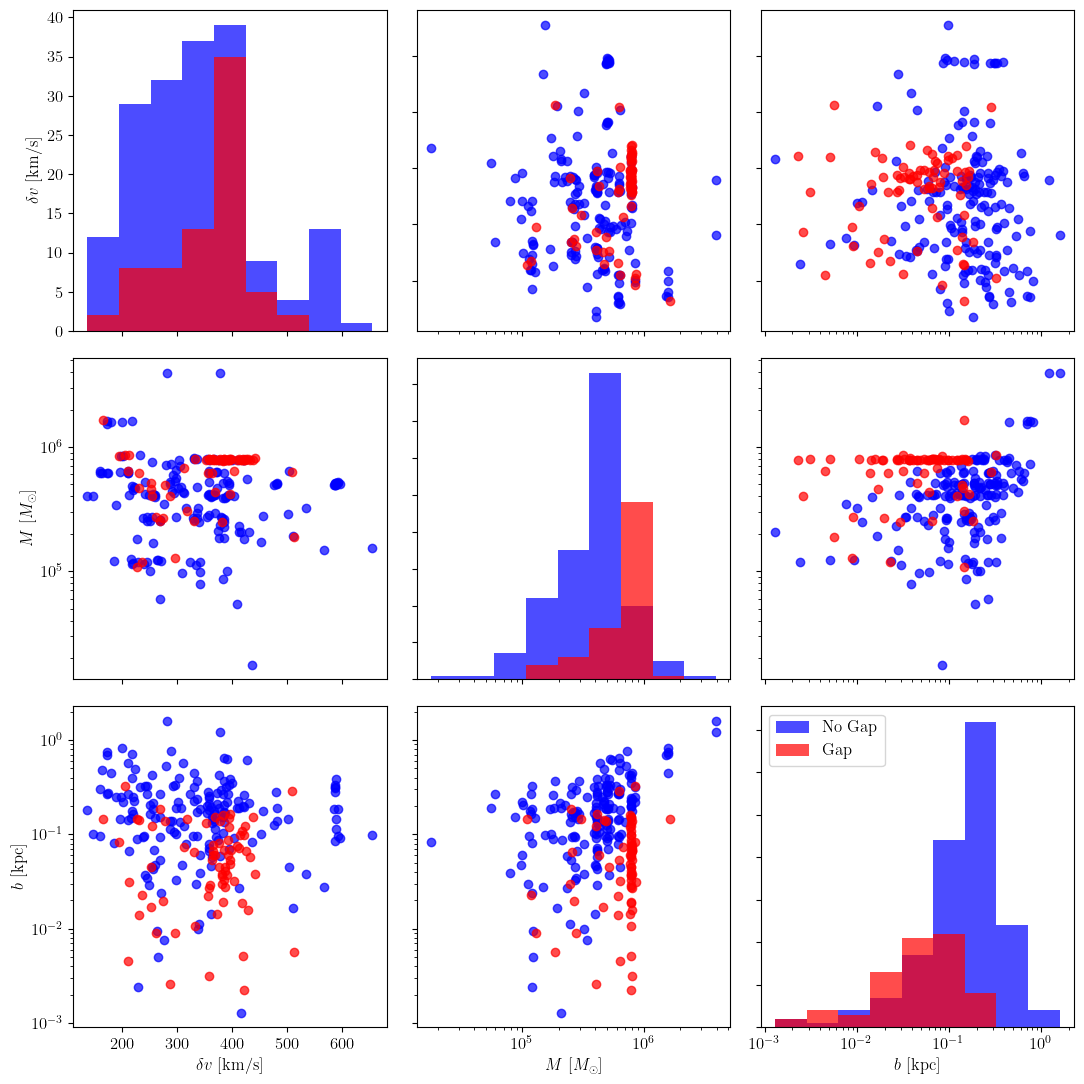

In [6]:


columns=selected_df.columns
log_columns = ['Mass [$M_{\odot}$]', 'Impact parameter [kpc]']  
n = len(columns) - 1 


# Create a figure with a gridspec layout
fig = plt.figure(figsize=(11, 11))
gs = GridSpec(n, n, figure=fig)

# Plot the pair plot
for i in range(n):
    for j in range(n):
        ax = fig.add_subplot(gs[i, j])
        
        if i == j:
            # Diagonal: Histogram with log-spaced bins if log scale
            if target_columns[i] in log_columns:
                bins = np.logspace(np.log10(selected_df[target_columns[i]].min()), np.log10(selected_df[target_columns[i]].max()), 10)
                # ax.hist(selected_df[target_columns[i]], bins=bins, color='blue', alpha=0.7)
                ax.hist(selected_df[target_columns[i]][~gap_flag], bins=bins, color='blue', alpha=0.7, label='No Gap')
                histcounts,bins,_=ax.hist(selected_df[target_columns[i]][gap_flag], bins=bins, color='red', alpha=0.7, label='Gap')
                ax.set_xscale('log')
            else:
                bins = np.linspace(selected_df[target_columns[i]].min(), selected_df[target_columns[i]].max(), 10)
                ax.hist(selected_df[target_columns[i]][~gap_flag], bins=bins, color='blue', alpha=0.7, label='No Gap')
                ax.hist(selected_df[target_columns[i]][gap_flag], bins=bins,color='red', alpha=0.7, label='Gap')
        else:
            # Off-diagonal: Scatter plot
            ax.scatter(selected_df[target_columns[j]][~gap_flag], selected_df[target_columns[i]][~gap_flag], c='blue', alpha=0.7, label='No gap')
            ax.scatter(selected_df[target_columns[j]][gap_flag], selected_df[target_columns[i]][gap_flag], c='red', alpha=0.7, label='Gap')
            if target_columns[j] in log_columns:  # Replace with your column names
                ax.set_xscale('log')
            if target_columns[i] in log_columns:  # Replace with your column names
                ax.set_yscale('log')
        
        # Set axis labels
        if i == n - 1:
            # if np.mod(j, 2) == 0:
            ax.set_xlabel(axis_labels[target_columns[j]])
        else:
            ax.set_xticklabels([])
        
        if j == 0:
            # if np.mod(i, 2) == 1:
            ax.set_ylabel(axis_labels[target_columns[i]])
        else:
            ax.set_yticklabels([])

        if np.logical_and(i == n-1, j == n-1):
            ax.legend()


fig.tight_layout()

fig.savefig("../paper/impact_geometry_statistics.png",dpi=300)

In [7]:
from astropy import constants as const  
from astropy import units as u

In [8]:
G = const.G
unitG = (u.km/u.s)**2 * u.kpc / u.Msun
G=G.to(unitG).value

In [9]:
deltaP=2*G*results["Mass"]/(results['impact_parameter']*results["v_rel"])
log10deltaP=np.log10(deltaP)

In [10]:
nbins = int(np.ceil(np.sqrt(len(deltaP))))
bins = np.logspace(np.log10(deltaP.min()), np.log10(deltaP.max()), nbins)

In [11]:
AXIS={
    "xscale": "log",
    "xlabel": r"$\Delta$ v [km/s]",
    "ylabel": r"Counts",
}

In [12]:
# Configure Matplotlib to use LaTeX for text rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use 'serif' or specify the exact font family
    "font.serif": ["Times New Roman"],  # Replace with the font used in your LaTeX document
    "axes.labelsize": 12,  # Font size for axis labels
    "font.size": 12,  # General font size
    "legend.fontsize": 12,  # Font size for legend
    "xtick.labelsize": 12,  # Font size for x-axis tick labels
    "ytick.labelsize": 12,  # Font size for y-axis tick labels
})

In [13]:
NGC2808_criteria=results["suspect"] == "NGC2808"


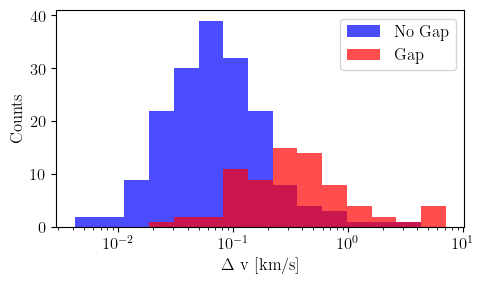

In [14]:
fig,axis=plt.subplots(figsize=(5,3))
axis.hist(deltaP[~gap_flag], bins=bins, color='blue', alpha=0.7, label='No Gap')
axis.hist(deltaP[gap_flag], bins=bins, color='red', alpha=0.7, label='Gap')
# axis.hist(deltaP[np.logical_and(NGC2808_criteria,gap_flag)], bins=bins, color='green', alpha=0.7, label='NGC2808 With Gap')
# axis.hist(deltaP[np.logical_and(NGC2808_criteria,~gap_flag)], bins=bins, color='black', alpha=0.7, label='NGC2808 Without Gap')
axis.legend()
axis.set(**AXIS)
fig.tight_layout()
fig.savefig("../paper/impact_geometry_statistics_deltaP.png",dpi=300)


In [140]:
deltaPNoGap=deltaP[~gap_flag]
noGAP = results[~gap_flag]
strongest=np.argsort(deltaPNoGap).to_numpy()[::-1]
ii=5
print(deltaPNoGap.iloc[strongest[ii]])
print(noGAP.iloc[strongest[ii]])

0.6519420192884596
impact_parameter           0.014491
w_par                    260.864971
w_per                    250.655741
v_rel                    361.771797
alpha                      -2.26166
Mass                  397338.397588
rplum                      0.004192
T                         -1.419689
tau                        -0.00504
suspect                     NGC5272
montecarlokey       monte-carlo-023
target_number                     0
gap_flag                      False
Name: 114, dtype: object


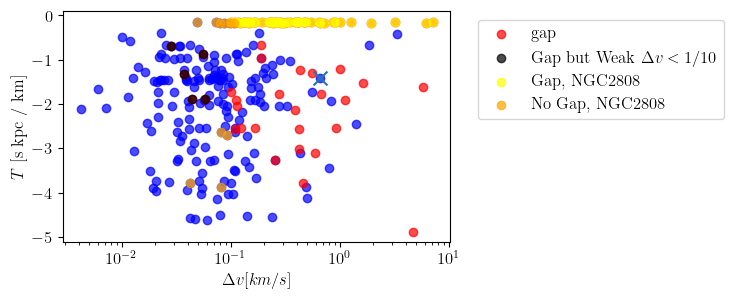

In [141]:
criteria1=deltaP < 1/10
fig,axis=plt.subplots(figsize=(5,3))
axis.scatter(deltaP[~gap_flag],results["T"][~gap_flag],c='blue',alpha=0.7)
axis.scatter(deltaP[gap_flag],results["T"][gap_flag],c='red',alpha=0.7, label=r"gap")
axis.scatter(deltaP[np.logical_and(criteria1,gap_flag)],results["T"][np.logical_and(criteria1,gap_flag)],c='black',alpha=0.7, label=r"Gap but Weak $\Delta v < 1/10$")
axis.scatter(deltaP[np.logical_and(NGC2808_criteria,gap_flag)],results["T"][np.logical_and(NGC2808_criteria,gap_flag)],c='yellow',alpha=0.7, label=r"Gap, NGC2808")
axis.scatter(deltaP[np.logical_and(NGC2808_criteria,~gap_flag)],results["T"][np.logical_and(NGC2808_criteria,~gap_flag)],c='orange',alpha=0.7, label=r" No Gap, NGC2808")
axis.scatter(deltaPNoGap.iloc[strongest[ii]],noGAP['T'].iloc[strongest[ii]],marker="x",s=100)
axis.set_xscale('log')
axis.set_xlabel(r"$\Delta v [km/s]$")
axis.set_ylabel(r"$T$ [s kpc / km]")
axis.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [73]:
import gcs 
import stream_analysis as sa

In [143]:
MWpotential="pouliasis2017pii-GCNBody"
GCname="Pal5"
NP=int(1e5)
montecarlokey="monte-carlo-048"
internal_dynamics="isotropic-plummer"


In [103]:
streampath=ph.old_streams(MWpotential=MWpotential,GCname=GCname,montecarlokey=montecarlokey,NP=NP)
orbitpath=ph.GC_orbits(MWpotential=MWpotential,GCname=GCname)
t,x,y,z,vx,vy,vz=gcs.extractors.GCOrbits.extract_whole_orbit(orbitpath,montecarlokey=montecarlokey)
t,x,y,z,vx,vy,vz=sa.tailCoordinates.filter_orbit_by_dynamical_time(t,x,y,z,vx,vy,vz,time_of_interest=0,nDynTimes=3)
tesc,xp,yp,zp,vxp,vyp,vzp=gcs.extractors.Stream.extract_old_streams(streampath,internal_dynamics=internal_dynamics,NP=NP,montecarlokey=montecarlokey)
xt,yt,zt,vxt,vyt,vzt,indexes=sa.tailCoordinates.transform_from_galactico_centric_to_tail_coordinates(
    xp,yp,zp,vxp,vyp,vzp,
    t,x,y,z,vx,vy,vz,
    t0=0,)

In [104]:
vanilla="pouliasis2017pii"
streampath=ph.old_streams(MWpotential=vanilla,GCname=GCname,montecarlokey=montecarlokey,NP=NP)
orbitpath=ph.GC_orbits(MWpotential=vanilla,GCname=GCname)
t,x,y,z,vx,vy,vz=gcs.extractors.GCOrbits.extract_whole_orbit(orbitpath,montecarlokey=montecarlokey)
t,x,y,z,vx,vy,vz=sa.tailCoordinates.filter_orbit_by_dynamical_time(t,x,y,z,vx,vy,vz,time_of_interest=0,nDynTimes=3)
tesc,xp,yp,zp,vxp,vyp,vzp=gcs.extractors.Stream.extract_old_streams(streampath,internal_dynamics=internal_dynamics,NP=NP,montecarlokey=montecarlokey)
xtV,ytV,ztV,vxtV,vytV,vztV,indexesV=sa.tailCoordinates.transform_from_galactico_centric_to_tail_coordinates(
    xp,yp,zp,vxp,vyp,vzp,
    t,x,y,z,vx,vy,vz,
    t0=0,)

In [105]:
xlims=[-15,15]
ylims=[-0.5,0.5]
X,Y,H=sa.plotters.binned_density.short_cut(NP,xt,yt,xlims,ylims)
H=H/NP

In [106]:
XV,YV,HV=sa.plotters.binned_density.short_cut(NP,xtV,ytV,xlims,ylims)
HV=HV/NP

In [107]:
x0,c0=   sa.density_profile_gap_detections.get_profile(xt,yt,NP,xlims,ylims)
xV,cV=   sa.density_profile_gap_detections.get_profile(xtV,ytV,NP,xlims,ylims)

In [108]:
box_length=3
N_APPlY=1
do_cross_correlation=True
XX,c00,cVV=sa.density_profile_gap_detections.clean_up_stream_profiles(x0,c0,cV,box_length,N_APPlY,do_cross_correlation)


In [147]:
results['montecarlokey']==montecarlokey
results['suspect'][results['montecarlokey']==montecarlokey] 
# results['gap_flag'][results['montecarlokey']==montecarlokey] 

239    NGC7089
240    NGC5272
241    NGC2808
242     NGC104
243    NGC5272
Name: suspect, dtype: object

In [109]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

In [110]:
normalScatterProperties = {
    "alpha":0.7, 
    "s":2,
    "cmap":'rainbow',
    "norm":mcolors.LogNorm(vmin=1e-5, vmax=8e-4)
    }
AXIS={
    "ylabel":"$y_{tail}$ [kpc]",
    "xlim":xlims,
    "ylim":ylims,
    "yticks": [0,0.5],
    "yticks": np.arange(-0.4,0.5,0.2),
}
AXIS0=AXIS.copy()
AXIS1=AXIS.copy()
AXIS1['xticks']=[]
AXIS1['xlabel']=''
AXIS0['xticks']=[]
AXIS0['xlabel']=''
cbarlabel=r'$\rho_{\rm{tail}}$'

AXIS2={
    "yscale":"log",
    "xlabel":"$x_{tail}$ [kpc]",
    "xlim":xlims,
    "xticks": np.arange(-10,11,2),

}

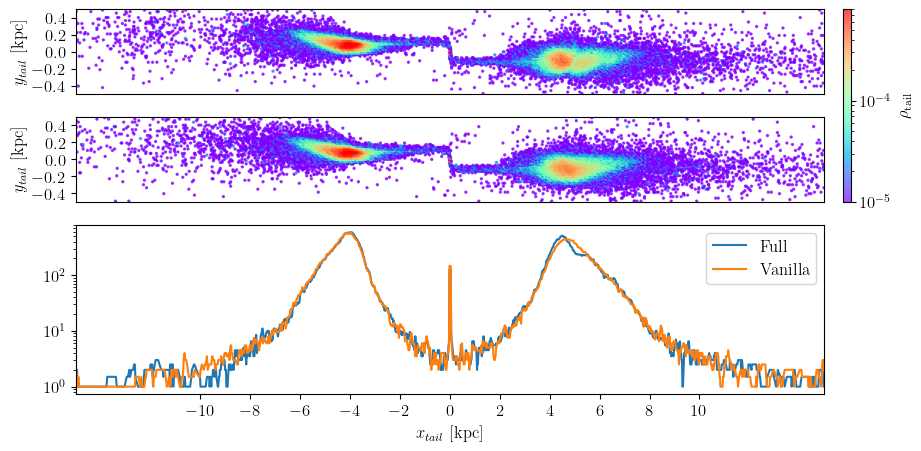

In [111]:
fig=plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(3, 2, width_ratios=[1, 0.01],height_ratios=[1,1,2],wspace=0.05)
cbar=fig.add_subplot(gs[0:2,1])
axis0=fig.add_subplot(gs[0,0])
axis1=fig.add_subplot(gs[1,0])
axis2=fig.add_subplot(gs[2,0])
im = axis0.scatter(X,Y,c=H,**normalScatterProperties)
axis1.scatter(XV,YV,c=HV,**normalScatterProperties)
cbar = plt.colorbar(im, cax=cbar)
cbar.set_label(cbarlabel)

axis2.plot(XX,c00,label="Full")
axis2.plot(XX,cVV,label="Vanilla")
axis0.set(**AXIS0);
axis1.set(**AXIS1);
axis2.set(**AXIS2);
axis2.legend()
# im=axis.scatter(X,Y,c=H,s=2,alpha=0.5,norm=mcolors.LogNorm(vmin=1/NP,vmax=1e2/NP))


In [112]:
tau=t[indexes]
tauV=t[indexesV]

In [113]:
box_length=4
nbins = int(np.ceil(np.sqrt(NP)))
bins=np.linspace(-1/10,1/10,nbins)
counts,edges=np.histogram(tau,bins=bins)
countsV,edges=np.histogram(tauV,bins=bins)
centers=(edges[1:]+edges[:-1])/2

edges,counts,countsV=sa.density_profile_gap_detections.clean_up_stream_profiles(centers,counts,countsV,box_length,N_APPlY,do_cross_correlation)

In [166]:
arrowprops=dict(facecolor='red',edgecolor="white", width=2, headwidth=8)
title={"monte-carlo-048":"Sampling 048"}
note={"monte-carlo-048":
      [dict(text="NGC5272",xy=(-0.0625,1e1),xytext=(-0.03,1e1),arrowprops=arrowprops),
      dict(text="NGC7089",xy=(0.0325,1.5e3),xytext=(0.0425,1e1),arrowprops=arrowprops)],}
AXIS={
    "yscale":"log",
    "xlabel":r"$\tau$ [s kpc / km]",
    "ylabel":"Counts",
    "xlim":[-1/10,1/10],
    "title":title[montecarlokey]
}

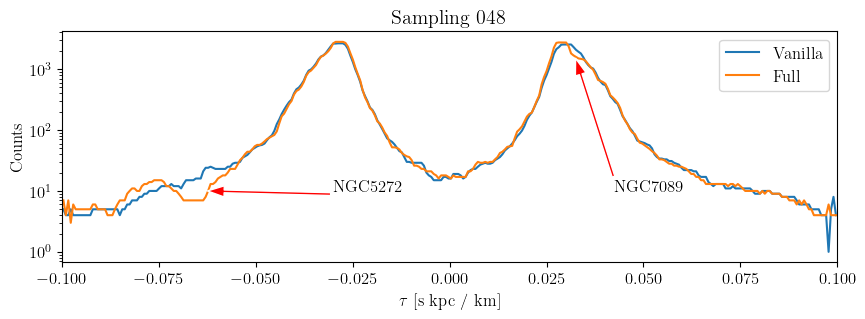

In [168]:
fig,axis=plt.subplots(1,1,figsize=(10,3))
axis.plot(edges,countsV,label="Vanilla")
axis.plot(edges,counts,label="Full")
arrowprops=dict(facecolor='red',edgecolor="white", width=2, headwidth=8)
for mynote in note[montecarlokey]:
    axis.annotate(**mynote)

axis.set(**AXIS);
axis.legend()
fig.savefig("../paper/tau-profile-"+montecarlokey+".png",dpi=300)